# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

____

I’ll be presenting the main dataset I submitted last semester for Milestone 2. This dataset, sourced from the U.S. Energy Information Administration (EIA), details power generators and their output across U.S. power plants—both those connected to the power grid and those operating independently on a daily basis.

We were particularly interested in the small modular nuclear reactors recently contracted by Big Tech companies to meet the energy demands of their new AI models. Our focus was on comparing these new plants to existing power plant types in terms of energy output and operational and maintenance costs. This first dataset provides a foundation for that analysis in terms of looking into the power output of existing energy types.

**Who:**

The primary audience for this dataset consists of decision-makers at tech companies as these individuals are responsible for selecting energy sources to power new data centers meant for AI training.

**What:**

The key focus of this analysis is to provide insights into energy options for data center expansion. Specifically, it will examine:
	•	The expected energy output of various power sources once infrastructure is in place.
	•	Categorical factors that may influence energy generation and reliability.
	•	Cost considerations, including both initial build-out expenses and long-term operational and maintenance costs.

**How:**

Success will be measured by the ability to:
	•	Identify the most cost-effective and reliable energy sources for scaling data center operations.
	•	Highlight key constraints or limiting factors that may impact decision-making.


___

# 3. Homework - work with your own data

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

1) Summarize the datasets using info() and describe()

2) Are there any duplicate rows?

3)  Are there any duplicate values in a given column (when this would be inappropriate?)

4) What are the mean, median, and mode of each column?

5) Are there any missing or null values?

    5.a) Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

6) Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

7) Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

8) Are the data usable?  If not, find some new data!

9) Do you need to modify or correct the data in some way?

10) Is there any class imbalance?  (Categories that have many more items than other categories).

____

#### **Quick blurb about dataset**

I'll conduct the analysis on the main dataset that I contributed to the project last semester -- as a quick blurb:

This dataset is from the U.S. Energy Information Administration (EIA), which details every power generator in the U.S., including its energy source (wind, solar, natural gas, etc.) and electricity output. The dataset consists of 26,010 records and 72 columns, including 60 categorical and 10 numeric variables. The numeric fields primarily describe capacity (e.g., summer/winter capacity, planned capacity), while categorical fields capture attributes like plant type, location, sector, and operational status. Over 40 columns have complete data, with null values largely confined to fields specific to certain generator types (e.g., pulverized coal for coal plants).

The purpose of this dataset -- the 'why' so to speak -- is to determine which traditional energy sources generate the highest power output per generator.

#### **First Let's Import the Data**

In [35]:

Power_Generation = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester one/AI for Leaders/Datasets/EIA_Power_Mix_2023.csv")

Power_Generation.head()

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_4821/1104620558.py:1: DtypeWarning: Columns (17,18,35,36,37,38,40,41,42,51,52,53,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  Power_Generation = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester one/AI for Leaders/Datasets/EIA_Power_Mix_2023.csv")


,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Technology,Prime Mover,Unit Code,...,Planned Energy Source 1,Planned New Nameplate Capacity (MW),Planned Repower Month,Planned Repower Year,Other Planned Modifications?,Other Modifications Month,Other Modifications Year,Multiple Fuels?,Cofire Fuels?,Switch Between Oil and Natural Gas?
0,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,1,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
1,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,2,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
2,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,3,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
3,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,5.1,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,N,N
4,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,WT1,Onshore Wind Turbine,WT,NaN,...,NaN,,,,NaN,,,NaN,NaN,NaN


Looks like there are 73 columns and over 26,000 records. Upon further investigation, it looks like a lot of these columns are needless for our current analysis. (They might be useful later, but not for the purposes of this initial EDA) so moving forward, I'll only work with columns that make sense for our purposes. The columns chosen so far all have to do with:
 - identifying different generators (Plant, Generator information). 
 - Fuel Type (Technology, prime mover, Energy Source 1 - 6, and Multiple Fuels? )
 - Year and Efficiency Information ( Operational Year (year turned on), Planned Retirement Year)
 - Sector Name ( is it run for an electric utility, etc.)

In [36]:
# Columns that are Relevent to our analysis
selected_columns = [
    "Plant Code", "Plant Name", 
    "Generator ID", "Technology", "Prime Mover", "Nameplate Capacity (MW)", 
    "Nameplate Power Factor", "Summer Capacity (MW)", "Winter Capacity (MW)", 
    "Minimum Load (MW)", "Status", "Operating Month", "Operating Year", 
    "Planned Retirement Year", "Sector Name", "Energy Source 1", 
    "Energy Source 2", "Energy Source 3", "Energy Source 4", "Energy Source 5", 
    "Energy Source 6", "Multiple Fuels?"
]

Power_Generation_Selected = Power_Generation[selected_columns].copy()

Power_Generation_Selected.head()

,Plant Code,Plant Name,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Nameplate Power Factor,Summer Capacity (MW),Winter Capacity (MW),Minimum Load (MW),...,Operating Year,Planned Retirement Year,Sector Name,Energy Source 1,Energy Source 2,Energy Source 3,Energy Source 4,Energy Source 5,Energy Source 6,Multiple Fuels?
0,1,Sand Point,1,Petroleum Liquids,IC,0.9,0.8,0.4,0.4,0.4,...,2000,,Electric Utility,DFO,NaN,NaN,NaN,NaN,NaN,N
1,1,Sand Point,2,Petroleum Liquids,IC,0.9,0.8,0.3,0.3,0.3,...,2000,,Electric Utility,DFO,NaN,NaN,NaN,NaN,NaN,N
2,1,Sand Point,3,Petroleum Liquids,IC,0.5,0.8,0.3,0.3,0.3,...,2010,,Electric Utility,DFO,NaN,NaN,NaN,NaN,NaN,N
3,1,Sand Point,5.1,Petroleum Liquids,IC,0.4,0.8,0.3,0.3,0.2,...,2023,,Electric Utility,DFO,NaN,NaN,NaN,NaN,NaN,N
4,1,Sand Point,WT1,Onshore Wind Turbine,WT,0.5,0.9,0.1,0.1,0.1,...,2011,,Electric Utility,WND,NaN,NaN,NaN,NaN,NaN,NaN


#### **1) Let's do some quick summaries of the data to get a feel for what we're looking at**

In [37]:
Power_Generation_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26010 entries, 0 to 26009
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant Code               26010 non-null  int64  
 1   Plant Name               26010 non-null  object 
 2   Generator ID             26010 non-null  object 
 3   Technology               26010 non-null  object 
 4   Prime Mover              26010 non-null  object 
 5   Nameplate Capacity (MW)  26010 non-null  float64
 6   Nameplate Power Factor   26010 non-null  object 
 7   Summer Capacity (MW)     26010 non-null  object 
 8   Winter Capacity (MW)     26010 non-null  object 
 9   Minimum Load (MW)        26010 non-null  object 
 10  Status                   26010 non-null  object 
 11  Operating Month          26010 non-null  int64  
 12  Operating Year           26010 non-null  int64  
 13  Planned Retirement Year  26010 non-null  object 
 14  Sector Name           

#### **Quick Note on Null fields**
So far it looks like the only fields that have null values are Energy Source 2 - Energy Source 6, and 'Multiple Fuels?'. I would expect this of the 'Energy Source' fields because most generators would likely operate on a single data source and it wouldn't make sense to fill out the field if there wasn't a 2nd, 3rd, 6th, etc. Energy Source. 

Something that *is* surprising, however, is that the Multiple fuels column seems to either have a ton of null values, or it is inconsistently being filled out. (I would expect it to be filled with either 26010 Y or N values, OR I would expect it to have 3558 'Y' values, as there are 3,558 generators that have at least two fuel sources. -- We will have to look into this later.)

#### **1.b Using the describe function**

Quick Note: This will only work for Numeric Data columns so I only expect this to work for: 

- Utility ID (results will be non-sensical)
- Plant Code (results will be non-sensical)
- Nameplate Capacity (MW)
- Summer Capacity (MW)
- Winter Capacity (MW)
- Minimum Load (MW)
- Operating Month (results will be non-sensical)
- Operating Year (results will be non-sensical)
- Sector (results will be non-sensical)

In [38]:
#Note: This will only work for Numeric data columns
Power_Generation_Selected.describe()

,Plant Code,Nameplate Capacity (MW),Operating Month,Operating Year
count,26010.000000,26010.000000,26010.000000,26010.000000
mean,39872.459785,49.232730,6.828105,1996.327797
std,26776.531188,120.051879,3.620404,27.572532
min,1.000000,0.000000,1.000000,1891.000000
25%,6291.000000,1.400000,4.000000,1985.000000
50%,56026.000000,4.100000,7.000000,2006.000000
75%,60958.000000,45.000000,10.000000,2017.000000
max,67908.000000,1499.400000,12.000000,2023.000000


Convert columns to float

In [39]:
Power_Generation_Selected[['Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)']] = (Power_Generation_Selected[['Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)']].apply(pd.to_numeric, errors='coerce'))

Now only include the sensical ones 

In [40]:
Power_Generation_Selected[['Nameplate Capacity (MW)', 'Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)']].describe()

,Nameplate Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Minimum Load (MW)
count,26010.000000,25934.000000,25913.000000,19596.000000
mean,49.232730,45.791062,47.412129,21.149663
std,120.051879,113.455055,116.017036,63.558500
min,0.000000,0.100000,0.100000,0.000000
25%,1.400000,1.300000,1.300000,0.100000
50%,4.100000,4.000000,4.000000,1.000000
75%,45.000000,40.000000,42.000000,12.000000
max,1499.400000,1383.000000,1399.500000,1280.000000


___

#### **2) Checking for duplicates**

Quick note before we begin, a ton of these columns are categorical data points, tagging different generators with things like State, City, County, Energy Generation Type, etc. So while we don't expect duplicate values across *all* the columns, we *do* expect duplicate values *within* each column.

**First, let's check for duplicate records across the whole dataset**

In [41]:
duplicates = Power_Generation_Selected[Power_Generation_Selected.duplicated()]
duplicates


,Plant Code,Plant Name,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Nameplate Power Factor,Summer Capacity (MW),Winter Capacity (MW),Minimum Load (MW),...,Operating Year,Planned Retirement Year,Sector Name,Energy Source 1,Energy Source 2,Energy Source 3,Energy Source 4,Energy Source 5,Energy Source 6,Multiple Fuels?


As expected, no duplicates from a high level (data is identical across all columns) -- But next let's check each column 

____

#### **3) Duplicates in Each Column**

In [42]:
for col in Power_Generation_Selected.columns:
    duplicate_counts = Power_Generation_Selected.groupby(col).size().reset_index(name="Count")
    duplicate_counts = duplicate_counts[duplicate_counts["Count"] > 1]

    if duplicate_counts.empty:
        print(f"{col}: No Duplicates")
        
    else: 
        print(f"Duplicates found in: {col}")
        print(duplicate_counts)
        print() # seperator

Duplicates found in: Plant Code
       Plant Code  Count
0               1      6
2               3     12
3               4      3
5              10     11
6              11      3
...           ...    ...
12451       67743      3
12453       67745      2
12472       67853      2
12473       67856      4
12474       67886      2

[4555 rows x 2 columns]

Duplicates found in: Plant Name
                                 Plant Name  Count
1                          0 Hammond St CSG      2
2                              1 Commercial      2
24               160 Tihonet Rd Hybrid(CSG)      2
29                      191 Peachtree Tower      2
30                      196 Tremont St(CSG)      2
...                                     ...    ...
12444                           Zephyr Wind      3
12445             Zephyr Wind Project - 2.0      3
12446  Zero Waste Energy Development Co LLC      2
12447                      Zimmerman Energy      4
12448                    Zion Energy Center      

**Discussion of Duplicate Values in Each Column**

As stated previously, many of these columns contain categorical identifiers -- for example, if there was a so I'm not worried about the presence of duplicate values here. As for the Multiple Fuels? Column, the presence of Y and N indicates to me that this column was *sometimes* used to indicate if there were multiple fuels used, and other times it was left comepletely blank. 

____

#### **4) What are the Mean, Median, and Mode of Each Column?**

NOTE: I will only be doing this for Numeric columns that yield sensical answers -- For example, doing this on the 'capacity in MW' columns makes sense but doing it on dates or ID numbers doesn't make sense.

In [43]:
MeanMedianMode = Power_Generation_Selected[['Nameplate Capacity (MW)', 'Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)']]

for col in MeanMedianMode.columns:
    print(f"Column Name: {col}")
    print(f"Mean: {MeanMedianMode[col].mean():.2f}")
    print(f"Median: {MeanMedianMode[col].median()}")
    print(f"Mode: {MeanMedianMode[col].mode()}") 
    print() # Seperator

Column Name: Nameplate Capacity (MW)
Mean: 49.23
Median: 4.1
Mode: 0    1.0
Name: Nameplate Capacity (MW), dtype: float64

Column Name: Summer Capacity (MW)
Mean: 45.79
Median: 4.0
Mode: 0    1.0
Name: Summer Capacity (MW), dtype: float64

Column Name: Winter Capacity (MW)
Mean: 47.41
Median: 4.0
Mode: 0    1.0
Name: Winter Capacity (MW), dtype: float64

Column Name: Minimum Load (MW)
Mean: 21.15
Median: 1.0
Mode: 0    0.1
Name: Minimum Load (MW), dtype: float64



____

#### **5) & 5.a) Checking for Null Values**

Before doing this, I want to call out the following columns: 
- Energy Source (2 - 6) -- These are only ever filled out if the plant uses more than two types of fuel. 
- Planned Retirement Year -- This isn't filled out for plants that do not yet have a 'planned decommission date'
- Multiple Fuels?  -- Again only filled out if Multiple Fuels are used and as discussed previously, it was inconsistently used. 

5.a) Because the null values are confined to a few columns and follow an expected pattern, removing those columns seems like the best approach rather than removing the rows. (which woulld essentially amoount to me removing any data for generators that do NOT use multiple fuel types, etc. )

In [44]:
Power_Generation_Selected.isna().sum()

Plant Code                     0
Plant Name                     0
Generator ID                   0
Technology                     0
Prime Mover                    0
Nameplate Capacity (MW)        0
Nameplate Power Factor         0
Summer Capacity (MW)          76
Winter Capacity (MW)          97
Minimum Load (MW)           6414
Status                         0
Operating Month                0
Operating Year                 0
Planned Retirement Year        0
Sector Name                    0
Energy Source 1                0
Energy Source 2            22452
Energy Source 3            25567
Energy Source 4            25812
Energy Source 5            25906
Energy Source 6            25966
Multiple Fuels?             7618
dtype: int64

**Explaination**

The NA values at the bottom make total sense. But the values in the Capacity columns were not there before. Perhaps the .coerse() I used earlier to make these columns floats resulted in the NaN. -- Let's see if the output of the info function changed.

In [45]:
Power_Generation_Selected[['Generator ID', 'Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26010 entries, 0 to 26009
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Generator ID          26010 non-null  object 
 1   Summer Capacity (MW)  25934 non-null  float64
 2   Winter Capacity (MW)  25913 non-null  float64
 3   Minimum Load (MW)     19596 non-null  float64
dtypes: float64(3), object(1)
memory usage: 812.9+ KB


Yep it changed -- using the Generator ID field as a control group, there has been an obvious dip in the amount of Non-Null values in each of these fields. 

In order to check these out, I'm going to pull the index values from each row where these NaNs are occuring (for instance, null values occured on row 20, 330, 516 of the dataset, etc.)

In [46]:
Summer_Cap_Nulls = Power_Generation_Selected.query("`Summer Capacity (MW)`.isna()").index
Summer_Cap_Nulls

Index([  648,   649,  1094,  1095,  1384,  1702,  1703,  5808,  5809,  5810,
        5812,  5813,  5814,  5815,  5816,  5817,  5818,  6140,  6141,  6143,
        6144,  6962,  7200,  7323,  8544,  9005,  9007,  9008,  9041,  9697,
        9699,  9807,  9943,  9944,  9945,  9946,  9947,  9948, 10213, 11297,
       11298, 11943, 11944, 11947, 11948, 12319, 12320, 12321, 12322, 12323,
       12324, 12325, 12326, 12414, 12415, 12467, 12468, 12469, 12470, 12481,
       12482, 12483, 12636, 12637, 13210, 14765, 14766, 15902, 15903, 15904,
       17797, 17798, 18767, 18768, 19425, 19426],
      dtype='int64')

In [47]:
Winter_Cap_Nulls = Power_Generation_Selected.query("`Winter Capacity (MW)`.isna()").index
Winter_Cap_Nulls


Index([ 1094,  1095,  1394,  1702,  1703,  2374,  2375,  2376,  2377,  2378,
        3234,  3237,  3569,  3570,  4503,  5808,  5809,  5810,  5812,  5813,
        5814,  5815,  5816,  5817,  5818,  6140,  6141,  6143,  6144,  6751,
        6962,  7199,  7200,  7323,  8484,  8544,  9005,  9007,  9008,  9041,
        9697,  9699,  9807,  9943,  9944,  9945,  9946,  9947,  9948, 10213,
       11297, 11298, 11841, 11842, 11845, 11943, 11944, 11947, 11948, 12319,
       12320, 12321, 12322, 12323, 12324, 12325, 12326, 12414, 12415, 12467,
       12468, 12469, 12470, 12481, 12482, 12483, 12636, 12637, 13210, 13571,
       14285, 14286, 14287, 14288, 14289, 14290, 14765, 14766, 15555, 15556,
       16535, 16666, 18767, 18768, 19425, 19426, 19751],
      dtype='int64')

In [48]:
Min_Load_Nulls =  Power_Generation_Selected.query("`Minimum Load (MW)`.isna()").index
Min_Load_Nulls

Index([   17,    18,   863,   864,   865,   975,  1036,  1037,  1038,  1039,
       ...
       25995, 25996, 25997, 25998, 25999, 26000, 26001, 26006, 26007, 26009],
      dtype='int64', length=6414)

Now let's query these rows in the original dataframe (without my edits to change these to floats) to see if they were filled before. 

In [49]:
Power_Generation[['Minimum Load (MW)']].loc[Min_Load_Nulls]


,Minimum Load (MW)
17,
18,
863,
864,
865,
...,...
26000,
26001,
26006,
26007,


Hmm, Looks like we had some sneaky nulls in these columns after all. Let's pull them all together to get a sense of what we were looking at.

In [50]:

All_Nulls_Indexes = Min_Load_Nulls.union(Winter_Cap_Nulls).union(Summer_Cap_Nulls)
All_Nulls_Indexes


Index([   17,    18,   648,   649,   863,   864,   865,   975,  1036,  1037,
       ...
       25995, 25996, 25997, 25998, 25999, 26000, 26001, 26006, 26007, 26009],
      dtype='int64', length=6502)

In [51]:

Null_Values_DF = Power_Generation_Selected.loc[All_Nulls_Indexes]
Null_Values_DF

,Plant Code,Plant Name,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Nameplate Power Factor,Summer Capacity (MW),Winter Capacity (MW),Minimum Load (MW),...,Operating Year,Planned Retirement Year,Sector Name,Energy Source 1,Energy Source 2,Energy Source 3,Energy Source 4,Energy Source 5,Energy Source 6,Multiple Fuels?
17,3,Barry,A3C1,Natural Gas Fired Combined Cycle,CT,464.0,0.9,385.0,443.0,NaN,...,2023,,Electric Utility,NG,NaN,NaN,NaN,NaN,NaN,N
18,3,Barry,A3ST,Natural Gas Fired Combined Cycle,CA,310.0,0.9,300.0,300.0,NaN,...,2023,,Electric Utility,NG,NaN,NaN,NaN,NaN,NaN,N
648,388,Pilot Knob,1,Conventional Hydroelectric,HY,16.5,0.8,NaN,10.4,0.7,...,1957,,Electric Utility,WAT,NaN,NaN,NaN,NaN,NaN,N
649,388,Pilot Knob,2,Conventional Hydroelectric,HY,16.5,0.8,NaN,7.7,0.7,...,1957,,Electric Utility,WAT,NaN,NaN,NaN,NaN,NaN,N
863,502,Holly,5,Petroleum Liquids,IC,0.4,0.8,0.3,0.3,NaN,...,2000,,Electric Utility,DFO,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26000,67853,Delta Electronics Fremont,PV1,Solar Photovoltaic,PV,0.6,,0.6,0.6,NaN,...,2016,,Industrial Non-CHP,SUN,NaN,NaN,NaN,NaN,NaN,NaN
26001,67853,Delta Electronics Fremont,PV4,Solar Photovoltaic,PV,0.4,,0.4,0.4,NaN,...,2020,,Industrial Non-CHP,SUN,NaN,NaN,NaN,NaN,NaN,NaN
26006,67886,Gunther,ND001,Batteries,BA,1.5,,1.5,1.5,NaN,...,2023,,IPP Non-CHP,MWH,NaN,NaN,NaN,NaN,NaN,NaN
26007,67886,Gunther,ND002,Batteries,BA,1.5,,1.5,1.5,NaN,...,2023,,IPP Non-CHP,MWH,NaN,NaN,NaN,NaN,NaN,NaN



#### **Before we go any further, let's look up the definition of these fields so that you get a sense for my decisions:**

1.	**Nameplate Capacity (MW)**:
	- This represents the manufacturer’s maximum rated output of a generator under specific conditions, denoted in megawatts (MW). It’s the intended full-load sustained output of a facility.
2.	**Nameplate Power Factor**:
	- This is the ratio of real power (measured in kilowatts) to apparent power (measured in kilovolt-amperes) that the generator is designed to provide. It indicates the efficiency with which the generator converts electrical power into useful work.
3.	**Summer Capacity (MW)**:
	- The maximum output, in megawatts, that generating equipment can supply to system load during the summer peak demand period. This accounts for factors like ambient temperature and equipment limitations that might reduce capacity during hotter months.
4.	**Winter Capacity (MW)**:
	- Similar to Summer Capacity, this denotes the maximum output during the winter peak demand period. Generators often have different capacities in winter due to varying environmental conditions affecting performance.
5.	**Minimum Load (MW)**:
	- The minimum power output, in megawatts, that a generator can continuously produce without shutting down. Operating below this level can lead to inefficiencies or potential damage to the equipment.


**Link (From the agency that the data was originally pulled from): https://www.eia.gov/survey/form/eia_860m/definitions.pdf**

From these definitions, (at least for now) I'm ok with just using the Nameplate Capacity field as the overall average power output of the particular generator. I understand that there are going to be intricacies with how much power a particular generator can generate in the summer vs the winter, etc. But if we are comparing this to generators of new power plants, then it is a useful metric to use because power plants that haven't been built yet will have the have a NamePlate Capacity but I am not sure if they will have the Summer and Winter Capacities yet. 

#### **Solution (in this case):** 

I'll drop ***columns** not pertaining to the Technology Used, the Year the power plant came online, or the Fuel Type of the power plant. This will avoid having to punch holes in our dataset in order to accomodate plants

In [52]:
Model_Dataset_PowerGenteration = Power_Generation_Selected[['Technology', 'Nameplate Capacity (MW)', 'Operating Year']]
Model_Dataset_PowerGenteration

,Technology,Nameplate Capacity (MW),Operating Year
0,Petroleum Liquids,0.9,2000
1,Petroleum Liquids,0.9,2000
2,Petroleum Liquids,0.5,2010
3,Petroleum Liquids,0.4,2023
4,Onshore Wind Turbine,0.5,2011
...,...,...,...
26005,Petroleum Liquids,2.0,2002
26006,Batteries,1.5,2023
26007,Batteries,1.5,2023
26008,Batteries,6.2,2021


So we'll have to hot encode our dataset to get the categorical Technology field into something usable but this is more or less what we'll end up with when we drop the columns and rows we need to drop. 

#### **6) Check for any other Inconsistent Data**

For this, we need to check two things: 
- 1) We need to filter out any records where more than one energy source were used. 
    - The Multiple fuels column was filled out inconsistently -- We can try to get around this by using the 'energy source' columns (ostensibly anything that has a 3rd, through 6th energy source also had a second but let's check just to make sure). 

In [53]:
suspicious_multiple_energy_sources = Power_Generation_Selected.query("(`Energy Source 3`.notna() or `Energy Source 4`.notna() or `Energy Source 5`.notna() or `Energy Source 6`.notna()) and `Energy Source 2`.isna()")
suspicious_multiple_energy_sources

,Plant Code,Plant Name,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Nameplate Power Factor,Summer Capacity (MW),Winter Capacity (MW),Minimum Load (MW),...,Operating Year,Planned Retirement Year,Sector Name,Energy Source 1,Energy Source 2,Energy Source 3,Energy Source 4,Energy Source 5,Energy Source 6,Multiple Fuels?
934,544,Devon Station,10,Petroleum Liquids,GT,18.6,0.9,14.4,19.2,14.4,...,1985,,IPP Non-CHP,KER,NaN,JF,DFO,NaN,NaN,N
1641,976,Marion,1,Conventional Steam Coal,ST,33.0,0.9,40.0,40.0,30.0,...,1963,,Electric Utility,BIT,NaN,PC,NaN,NaN,NaN,N
1642,976,Marion,2,Conventional Steam Coal,ST,33.0,0.9,40.0,40.0,30.0,...,1963,,Electric Utility,BIT,NaN,PC,NaN,NaN,NaN,N
1643,976,Marion,3,Conventional Steam Coal,ST,33.0,0.9,40.0,40.0,30.0,...,1963,,Electric Utility,BIT,NaN,PC,NaN,NaN,NaN,N
4285,2817,Leland Olds,1,Conventional Steam Coal,ST,216.0,0.9,220.0,220.0,92.0,...,1966,,Electric Utility,LIG,NaN,SUB,NaN,NaN,NaN,N
4286,2817,Leland Olds,2,Conventional Steam Coal,ST,440.0,0.9,440.0,440.0,192.0,...,1975,,Electric Utility,LIG,NaN,SUB,NaN,NaN,NaN,N
11937,55216,Morris Cogeneration LLC,UNT1,Natural Gas Fired Combined Cycle,CT,45.3,0.9,44.0,44.0,22.0,...,1998,,IPP CHP,NG,NaN,OG,NaN,NaN,NaN,N
11938,55216,Morris Cogeneration LLC,UNT2,Natural Gas Fired Combined Cycle,CT,45.3,0.9,44.0,44.0,22.0,...,1998,,IPP CHP,NG,NaN,OG,NaN,NaN,NaN,N
11939,55216,Morris Cogeneration LLC,UNT3,Natural Gas Fired Combined Cycle,CT,45.3,0.9,44.0,45.0,22.0,...,1998,,IPP CHP,NG,NaN,OG,NaN,NaN,NaN,N
20393,61675,NCSU CCUP Cogeneration Plant,STG,Natural Gas Steam Turbine,ST,1.0,0.8,1.0,1.0,0.1,...,2019,,Commercial CHP,NG,NaN,NG,DFO,NaN,NaN,N


So it looks like there are some rows where a 3rd - 6th energy source was filled out but the the second one was not. Interestingly enough, for each of these, the Multiple Fields? == N. Because this is such a low number of records (10) compared to > 26,000 in the dataset, I'll just drop these rows. 

In [54]:
suspicious_multiple_energy_sources.index

Index([934, 1641, 1642, 1643, 4285, 4286, 11937, 11938, 11939, 20393], dtype='int64')

In [55]:
print(f"Before drop: {len(Power_Generation_Selected)}")
Power_Generation_Selected = Power_Generation_Selected.drop(index=suspicious_multiple_energy_sources.index)
print(f"After drop: {len(Power_Generation_Selected)}")

Before drop: 26010
After drop: 26000


It worked :)

Now we should probably drop the rows of the generators that have multiple data sources. 

In [56]:
mult_power_sources = Power_Generation_Selected.query("`Energy Source 2`.notna() or `Energy Source 3`.notna() or `Energy Source 4`.notna() or `Energy Source 5`.notna() or `Energy Source 6`.notna()").index
mult_power_sources

Index([   25,    26,    27,    28,    29,    30,    31,    32,    33,    69,
       ...
       25200, 25201, 25202, 25203, 25204, 25205, 25206, 25207, 25281, 25282],
      dtype='int64', length=3558)

In [57]:
print(f"Before drop: {len(Power_Generation_Selected)}")
Power_Generation_Selected = Power_Generation_Selected.drop(index=mult_power_sources)
print(f"After drop: {len(Power_Generation_Selected)}")

Before drop: 26000
After drop: 22442


And after filtering out the columns from earlier we have: 

In [58]:
Model_Dataset_PowerGenteration = Power_Generation_Selected[['Technology', 'Nameplate Capacity (MW)', 'Operating Year']]
Model_Dataset_PowerGenteration

,Technology,Nameplate Capacity (MW),Operating Year
0,Petroleum Liquids,0.9,2000
1,Petroleum Liquids,0.9,2000
2,Petroleum Liquids,0.5,2010
3,Petroleum Liquids,0.4,2023
4,Onshore Wind Turbine,0.5,2011
...,...,...,...
26005,Petroleum Liquids,2.0,2002
26006,Batteries,1.5,2023
26007,Batteries,1.5,2023
26008,Batteries,6.2,2021


____

#### **7) Categorical Variable Encoding**

Now we should encode the Categorical Variable Technology into something that can be recognized in ML. 


First let's take a closer look at what exactly is in the Technology field. The following code will use a groupby to do a count and an average. The reason behind this is that some of the categories in the technology field seem reasonably close to each other -- if they are then we could create a new column that would aggregate the 5+ natural gas types into a larger 'Natural Gas' category so that encoding doesn't create a ton of columns

In [59]:
Grouped_Stats = Model_Dataset_PowerGenteration.groupby("Technology").agg({
    "Nameplate Capacity (MW)": "mean",
    "Technology": "count"
}).rename(columns={
    "Nameplate Capacity (MW)": "Avg Nameplate Capacity (MW)", 
    "Technology": "Count of Operating Plants"
}).reset_index() # FIXED: Keep Technology as a column
Grouped_Stats

,Technology,Avg Nameplate Capacity (MW),Count of Operating Plants
0,All Other,18.678947,76
1,Batteries,27.412095,587
2,Conventional Hydroelectric,19.997374,3999
3,Conventional Steam Coal,475.932922,243
4,Flywheels,9.400000,5
5,Geothermal,24.008982,167
6,Hydroelectric Pumped Storage,145.855921,152
7,Landfill Gas,1.556138,896
8,Municipal Solid Waste,28.763793,58
9,Natural Gas Fired Combined Cycle,172.995800,1500


Oof. It looks like there is a wide discrepency in the average power between a ton of categories that I would have traditionally assumed would be very similar. I guess it's probably better to leave them as is rather than throwing them into a new category

But anyways -- let's do some encoding

In [60]:
Encoded_DF = Model_Dataset_PowerGenteration.copy()
one_hot = pd.get_dummies(Encoded_DF["Technology"])
Encoded_DF = Encoded_DF.join(one_hot)
Encoded_DF.head(5)

,Technology,Nameplate Capacity (MW),Operating Year,All Other,Batteries,Conventional Hydroelectric,Conventional Steam Coal,Flywheels,Geothermal,Hydroelectric Pumped Storage,...,Onshore Wind Turbine,Other Gases,Other Natural Gas,Other Waste Biomass,Petroleum Coke,Petroleum Liquids,Solar Photovoltaic,Solar Thermal with Energy Storage,Solar Thermal without Energy Storage,Wood/Wood Waste Biomass
0,Petroleum Liquids,0.9,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,Petroleum Liquids,0.9,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,Petroleum Liquids,0.5,2010,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Petroleum Liquids,0.4,2023,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Onshore Wind Turbine,0.5,2011,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [61]:
Encoded_DF.drop(columns='Technology', axis=1, inplace=True)
Encoded_DF

,Nameplate Capacity (MW),Operating Year,All Other,Batteries,Conventional Hydroelectric,Conventional Steam Coal,Flywheels,Geothermal,Hydroelectric Pumped Storage,Landfill Gas,...,Onshore Wind Turbine,Other Gases,Other Natural Gas,Other Waste Biomass,Petroleum Coke,Petroleum Liquids,Solar Photovoltaic,Solar Thermal with Energy Storage,Solar Thermal without Energy Storage,Wood/Wood Waste Biomass
0,0.9,2000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.9,2000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.5,2010,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.4,2023,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.5,2011,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26005,2.0,2002,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
26006,1.5,2023,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26007,1.5,2023,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26008,6.2,2021,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


All done :)

___

#### **Conclusion**


**8) Are the data usable?  If not, find some new data!**

After doing this quick EDA of the data, I am confident that the data is useful in it's current form. We still have well over 22,000 rows spread across over 20 different power generation technologies. Using this dataset, we can answer questions like: 

 - Given current power plant efficiency trends, which type of power generation would have the highest output assuming a completion time in 2030? 
 - If a new natural gas plant was built in 2025, what is it's expected Nameplate Power Capacity (MW)? 


**9) Do you need to modify or correct the data in some way?**

In this state, there are still some imbalances in the dataset that we should account for before building any models after it. This is detailed in question 10. 

**10) Is there any class imbalance?  (Categories that have many more items than other categories)?**

There are definitely some class imbalances in the dataset -- 'Solar thermal with Energy Storage' for example only has 3 operating 'generators' in the United States while 'Solar Photovoltaic' has 6,308. In order to overcome this, we can either try to bootstrap (probably not a good idea if there are only three records of something) or we can drop these rows as they're likely not feasible optoins for future power plants. (Maybe it was designed as a proof of concept but the industry then moved in a different direction, etc. )

___

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

___

For the last part of question 6, I considered grouping similar technologies into broader categories—for example, consolidating all Natural Gas plants into a single “Natural Gas” category or merging Onshore and Offshore Wind into a general “Wind” category.

However, after analyzing the Avg Nameplate Capacity (MW) across different technologies, I noticed that their power outputs vary significantly. This contrast suggests that aggregating them into broader categories might obscure meaningful differences, making it preferable to keep them separate.

For this week’s graph question, I plan to visualize this impact using a split bar chart (from the readings). The chart will compare the original, detailed breakdown of technologies with the averaged values that would result from my proposed grouping—essentially evaluating how much information would have been lost in the process.

First, let's take a subset of Natural Gas data from the Aggregated Values we obtained earlier. 

In [62]:
Natural_Gas_Subset = Grouped_Stats.query("`Technology`.str.contains('Natural Gas')")
Natural_Gas_Subset

,Technology,Avg Nameplate Capacity (MW),Count of Operating Plants
9,Natural Gas Fired Combined Cycle,172.995800,1500
10,Natural Gas Fired Combustion Turbine,62.809364,1367
11,Natural Gas Internal Combustion Engine,3.471691,1254
12,Natural Gas Steam Turbine,142.593151,292
13,Natural Gas with Compressed Air Storage,110.000000,1
18,Other Natural Gas,1.753608,194


Next, I want to add an 'Overall' Row that will have that Avg Nameplate Capacity across *all* Natural Gas rows, and have the *totat* of all Operating plants of that type.

In [63]:
average_capacity = Natural_Gas_Subset["Avg Nameplate Capacity (MW)"].mean()
total_plants = Natural_Gas_Subset["Count of Operating Plants"].sum()

print(f"Average: {average_capacity}")
print(f"Total: {total_plants}")

Average: 82.27060218205447
Total: 4608


Next I want to add those values to a new row, with the Technology being overall, and concatenate that into the Natural_Gas_Subset dataframe

In [64]:
overall_row = pd.DataFrame({
    "Technology": ["Overall Average"],
    "Avg Nameplate Capacity (MW)": [average_capacity],
    "Count of Operating Plants": [total_plants]
})

Natural_Gas_Subset = pd.concat([Natural_Gas_Subset, overall_row], ignore_index=True) # Ignore index because the index from before was funky. 


Natural_Gas_Subset

,Technology,Avg Nameplate Capacity (MW),Count of Operating Plants
0,Natural Gas Fired Combined Cycle,172.995800,1500
1,Natural Gas Fired Combustion Turbine,62.809364,1367
2,Natural Gas Internal Combustion Engine,3.471691,1254
3,Natural Gas Steam Turbine,142.593151,292
4,Natural Gas with Compressed Air Storage,110.000000,1
5,Other Natural Gas,1.753608,194
6,Overall Average,82.270602,4608


Perfect, now we are ready to graph 

In [65]:
import matplotlib.pyplot as plt
import numpy as np


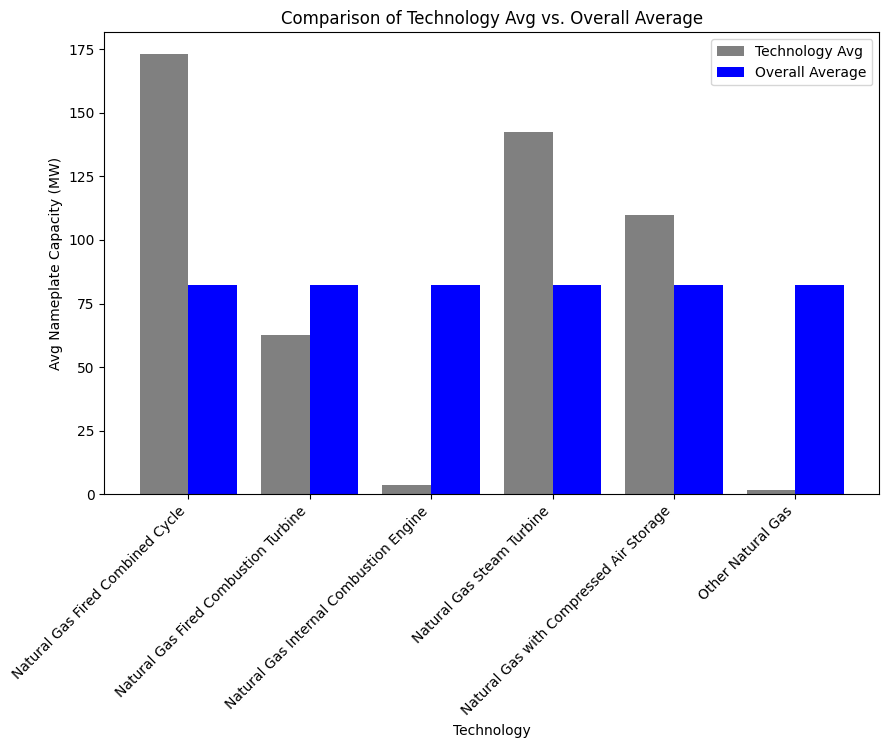

In [66]:
technologies = Natural_Gas_Subset.loc[0:5, "Technology"]
ave_nameplate_cap = Natural_Gas_Subset.loc[0:5, "Avg Nameplate Capacity (MW)"]
overall_avg = Natural_Gas_Subset.loc[6, "Avg Nameplate Capacity (MW)"]
overall_avg_values = [overall_avg] * len(technologies)

bar_width = 0.4

x = np.arange(len(technologies))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, ave_nameplate_cap, bar_width, label="Technology Avg", color="gray")
plt.bar(x + bar_width/2, overall_avg_values, bar_width, label="Overall Average", color="blue")


plt.xlabel("Technology")
plt.ylabel("Avg Nameplate Capacity (MW)")
plt.title("Comparison of Technology Avg vs. Overall Average")
plt.xticks(x, technologies, rotation=45, ha="right")  # Rotate for readability
plt.legend()


plt.show()